In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import math
import scipy.stats as stats
from datetime import datetime
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
    print('Not using a high-RAM runtime')
else:
    print('You are using a high-RAM runtime!')

Your runtime has 17.2 gigabytes of available RAM

Not using a high-RAM runtime


# Read data 

In [5]:
AESOP = pd.read_parquet('/Users/julianeoliveira/Documents/Projects/AESOP/AESOP datalake/Primary Health Care/srag_aps.parquet')

# Get the basic descriptions

In [6]:
AESOP.shape

(350854, 42)

In [7]:
AESOP.head()

,Uf,Ibge,Municipio,Atendimentos,populacao_estimada,SRAG_com_sintomas,SRAG_com_febre,srag_influenza,srag_outro_vírus,srag_outro_agente,srag_COVID_19,srag_não_especificado,Ano,Mes,Srag_Total,Gripal,Relacionada,Pulmonar,Não relacionada,Confundidor,PC_COBERTURA_SF,PC_COBERTURA_AB,measure_1f_12,d_measure_1f_12,q_measure_1f_12,PORTE_MUNICIPIO,UBS_Count,Cód Região de Saúde,Nome da Região de Saúde,long,lat,NM_MUN,SIGLA,AREA_KM2,Alergias,Dengue,srag,data,Pop,Intensidade,Soma_APS,gripal
0,CE,230535,ICAPUÍ,2464,19685,0,0,0,0,0,0,0,2017,1,0,91,73,1,297,23,100,100,0.817741,10.0,5.0,PEQUENO,8.0,23007,7ª Região Aracati-CE,-37.410463,-4.738625,Icapuí,CE,421.440,0,0,0,2017-01-01,19685,0.125171,474,91
1,PE,261050,PASSIRA,4329,28889,0,0,0,0,0,0,0,2017,1,0,62,42,12,118,8,100,100,1.276060,10.0,5.0,MEDIO,17.0,26006,Limoeiro-PE,-35.546453,-8.012348,Passira,PE,326.757,2,0,0,2017-01-01,28889,0.149849,245,62
2,PE,261220,SALGUEIRO,5026,60453,0,0,0,0,0,0,0,2017,1,0,229,180,15,1696,4,"91,82","91,82",0.077403,9.0,5.0,MEDIO,3.0,26011,Salgueiro-PE,-39.089847,-8.129101,Salgueiro,PE,1678.564,22,1,0,2017-01-01,60453,0.083139,2126,229
3,PB,251274,RIACHÃO,776,3607,0,0,0,0,0,0,0,2017,1,0,29,13,1,166,2,100,100,1.246145,10.0,5.0,PEQUENO,2.0,25002,2ª Região-PB,-35.647465,-6.541768,Riachão,PB,85.291,0,0,0,2017-01-01,3607,0.215137,210,29
4,PA,150307,GARRAFÃO DO NORTE,1137,25363,0,0,0,0,0,0,0,2017,1,0,80,122,8,249,6,"68,06","68,06",1.917779,10.0,5.0,MEDIO,NaN,15008,Metropolitana III-PA,-47.075962,-2.168264,Garrafão do Norte,PA,1608.014,0,0,0,2017-01-01,25363,0.044829,460,80


In [8]:
AESOP.columns

Index(['Uf', 'Ibge', 'Municipio', 'Atendimentos', 'populacao_estimada', 'SRAG_com_sintomas', 'SRAG_com_febre', 'srag_influenza', 'srag_outro_vírus', 'srag_outro_agente', 'srag_COVID_19', 'srag_não_especificado', 'Ano', 'Mes', 'Srag_Total', 'Gripal', 'Relacionada', 'Pulmonar', 'Não relacionada', 'Confundidor', 'PC_COBERTURA_SF', 'PC_COBERTURA_AB', 'measure_1f_12', 'd_measure_1f_12', 'q_measure_1f_12', 'PORTE_MUNICIPIO', 'UBS_Count', 'Cód Região de Saúde', 'Nome da Região de Saúde', 'long', 'lat', 'NM_MUN', 'SIGLA', 'AREA_KM2', 'Alergias', 'Dengue', 'srag', 'data', 'Pop', 'Intensidade', 'Soma_APS', 'gripal'], dtype='object')

In [10]:
AESOP.UBS_Count

0          8.0
1         17.0
2          3.0
3          2.0
4          NaN
          ... 
350849    13.0
350850     4.0
350851     8.0
350852     1.0
350853     6.0
Name: UBS_Count, Length: 350854, dtype: float64

In [8]:
selct = ['Uf', 'Ibge', 'Municipio', 'Atendimentos', 'populacao_estimada', 'Ano', 'Mes', 'Gripal', 'Relacionada', 'Pulmonar', 'Não relacionada', 'PC_COBERTURA_SF', 'PC_COBERTURA_AB', 'PORTE_MUNICIPIO', 'UBS_Count', 'Cód Região de Saúde', 'Nome da Região de Saúde', 'long', 'lat', 'NM_MUN', 'AREA_KM2', 'data', 'Pop', 'Soma_APS', 'gripal']

In [9]:
df = AESOP.filter(selct)

In [10]:
df.head(10)

,Uf,Ibge,Municipio,Atendimentos,populacao_estimada,Ano,Mes,Gripal,Relacionada,Pulmonar,Não relacionada,PC_COBERTURA_SF,PC_COBERTURA_AB,PORTE_MUNICIPIO,UBS_Count,Cód Região de Saúde,Nome da Região de Saúde,long,lat,NM_MUN,AREA_KM2,data,Pop,Soma_APS,gripal
0,CE,230535,ICAPUÍ,2464,19685,2017,1,91,73,1,297,100,100,PEQUENO,8.0,23007,7ª Região Aracati-CE,-37.410463,-4.738625,Icapuí,421.440,2017-01-01,19685,474,91
1,PE,261050,PASSIRA,4329,28889,2017,1,62,42,12,118,100,100,MEDIO,17.0,26006,Limoeiro-PE,-35.546453,-8.012348,Passira,326.757,2017-01-01,28889,245,62
2,PE,261220,SALGUEIRO,5026,60453,2017,1,229,180,15,1696,"91,82","91,82",MEDIO,3.0,26011,Salgueiro-PE,-39.089847,-8.129101,Salgueiro,1678.564,2017-01-01,60453,2126,229
3,PB,251274,RIACHÃO,776,3607,2017,1,29,13,1,166,100,100,PEQUENO,2.0,25002,2ª Região-PB,-35.647465,-6.541768,Riachão,85.291,2017-01-01,3607,210,29
4,PA,150307,GARRAFÃO DO NORTE,1137,25363,2017,1,80,122,8,249,"68,06","68,06",MEDIO,NaN,15008,Metropolitana III-PA,-47.075962,-2.168264,Garrafão do Norte,1608.014,2017-01-01,25363,460,80
5,BA,292400,PAULO AFONSO,10565,120706,2017,1,175,122,5,726,"69,04","69,04",GRANDE,29.0,29017,Paulo Afonso-BA,-38.293757,-9.539589,Paulo Afonso,1544.388,2017-01-01,120706,1048,175
6,PB,250470,CONGO,652,4789,2017,1,31,27,2,66,100,100,PEQUENO,4.0,25005,5ª Região-PB,-36.646494,-7.794988,Congo,324.686,2017-01-01,4789,126,31
7,SC,421720,SÃO MIGUEL DO OESTE,3344,39793,2017,1,127,161,6,590,"78,83","95,96",MEDIO,16.0,42001,Extremo Oeste-SC,-53.512333,-26.727191,São Miguel do Oeste,234.202,2017-01-01,39793,887,127
8,PA,150460,MOCAJUBA,1922,30277,2017,1,97,75,1,270,"92,47","92,47",MEDIO,9.0,15011,Tocantins-PA,-49.466410,-2.576713,Mocajuba,871.171,2017-01-01,30277,449,97
9,TO,170030,AGUIARNÓPOLIS,968,6460,2017,1,92,58,5,145,100,100,PEQUENO,3.0,17002,Bico do Papagaio-TO,-47.513456,-6.488534,Aguiarnópolis,236.792,2017-01-01,6460,303,92


In [11]:
df.data.value_counts();

In [23]:
data = df.groupby(['Uf', 'data','Ano', 'Mes'])['Atendimentos'].sum().reset_index()

In [24]:
data.head()

,Uf,data,Ano,Mes,Atendimentos
0,AC,2017-01-01,2017,1,36657
1,AC,2017-02-01,2017,2,46135
2,AC,2017-03-01,2017,3,58965
3,AC,2017-04-01,2017,4,46357
4,AC,2017-05-01,2017,5,60608


In [28]:
data['data'] = data['data'].apply(pd.to_datetime)

In [29]:
data[data['Uf'] == 'BA']

,Uf,data,Ano,Mes,Atendimentos
264,BA,2017-01-01,2017,1,437535
265,BA,2017-02-01,2017,2,575721
266,BA,2017-03-01,2017,3,762873
267,BA,2017-04-01,2017,4,653533
268,BA,2017-05-01,2017,5,850436
269,BA,2017-06-01,2017,6,651899
270,BA,2017-07-01,2017,7,844970
271,BA,2017-08-01,2017,8,977556
272,BA,2017-09-01,2017,9,851083
273,BA,2017-10-01,2017,10,895909


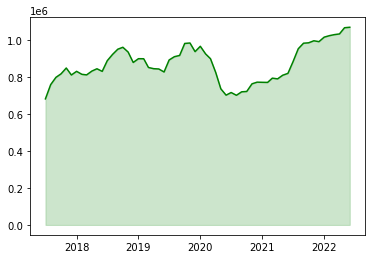

In [44]:
plt.plot(data[data['Uf'] == 'BA'].data,data[data['Uf'] == 'BA']['Atendimentos'].rolling(window=7).mean(),label='BA',color = 'green')
plt.fill_between(data[data['Uf'] == 'BA'].data, data[data['Uf'] == 'BA']['Atendimentos'].rolling(window=7).mean(), color = 'green',alpha=0.2)

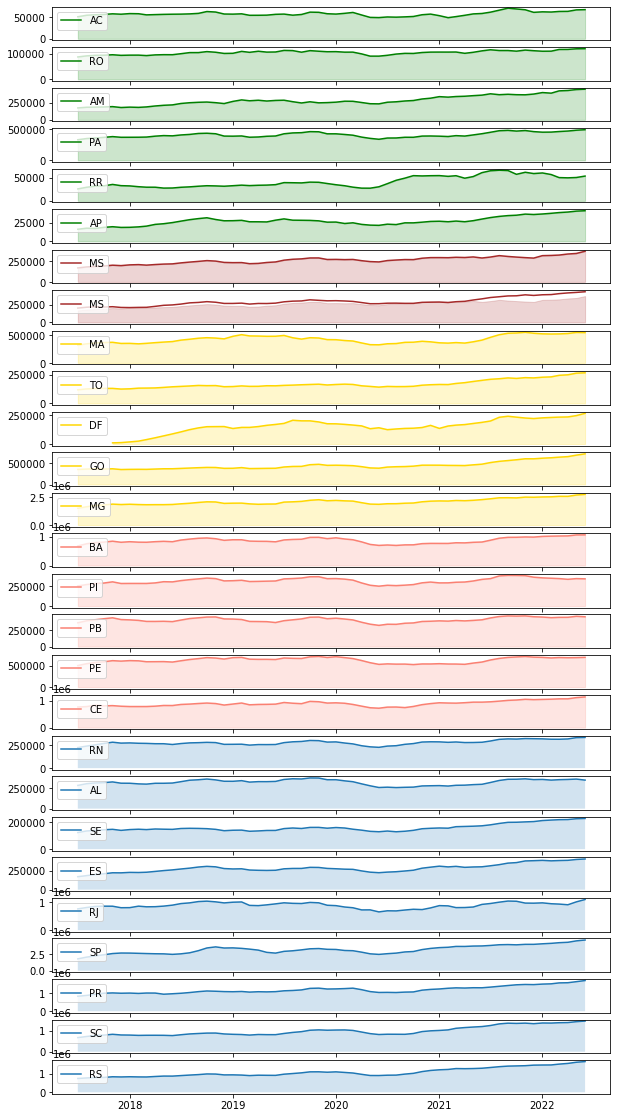

In [58]:
fig, [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,
      ax14,ax15,ax16,ax17,ax18,ax19,ax20,ax21,ax22,ax23,ax24,
      ax25,ax26,ax27] = plt.subplots(nrows=27, figsize=(10,20), sharex=True, sharey=False)

plt.subplots_adjust(wspace=1.5)

############# Região Amazonica ################

ax1.plot(data[data['Uf'] == 'AC'].data,data[data['Uf'] == 'AC']['Atendimentos'].rolling(window=7).mean(),label='AC',color = 'green')
ax1.fill_between(data[data['Uf'] == 'AC'].data, data[data['Uf'] == 'AC']['Atendimentos'].rolling(window=7).mean(), color = 'green',alpha=0.2)
ax1.legend(loc="upper left")

ax2.plot(data[data['Uf'] == 'RO'].data,data[data['Uf'] == 'RO']['Atendimentos'].rolling(window=7).mean(),label='RO',color = 'green')
ax2.fill_between(data[data['Uf'] == 'RO'].data, data[data['Uf'] == 'RO']['Atendimentos'].rolling(window=7).mean(), color = 'green',alpha=0.2)
ax2.legend(loc="upper left")

ax3.plot(data[data['Uf'] == 'AM'].data,data[data['Uf'] == 'AM']['Atendimentos'].rolling(window=7).mean(),label='AM',color = 'green')
ax3.fill_between(data[data['Uf'] == 'AM'].data, data[data['Uf'] == 'AM']['Atendimentos'].rolling(window=7).mean(), color = 'green',alpha=0.2)
ax3.legend(loc="upper left")

ax4.plot(data[data['Uf'] == 'PA'].data,data[data['Uf'] == 'PA']['Atendimentos'].rolling(window=7).mean(),label='PA',color = 'green')
ax4.fill_between(data[data['Uf'] == 'PA'].data, data[data['Uf'] == 'PA']['Atendimentos'].rolling(window=7).mean(), color = 'green',alpha=0.2)
ax4.legend(loc="upper left")

ax5.plot(data[data['Uf'] == 'RR'].data,data[data['Uf'] == 'RR']['Atendimentos'].rolling(window=7).mean(),label='RR',color = 'green')
ax5.fill_between(data[data['Uf'] == 'RR'].data, data[data['Uf'] == 'RR']['Atendimentos'].rolling(window=7).mean(), color = 'green',alpha=0.2)
ax5.legend(loc="upper left")

ax6.plot(data[data['Uf'] == 'AP'].data,data[data['Uf'] == 'AP']['Atendimentos'].rolling(window=7).mean(),label='AP',color = 'green')
ax6.fill_between(data[data['Uf'] == 'AP'].data, data[data['Uf'] == 'AP']['Atendimentos'].rolling(window=7).mean(), color = 'green',alpha=0.2)
ax6.legend(loc="upper left")


############### Pantanal/Cerrado ############

ax7.plot(data[data['Uf'] == 'MS'].data,data[data['Uf'] == 'MS']['Atendimentos'].rolling(window=7).mean(),label='MS',color = 'brown')
ax7.fill_between(data[data['Uf'] == 'MS'].data, data[data['Uf'] == 'MS']['Atendimentos'].rolling(window=7).mean(), color = 'brown',alpha=0.2)
ax7.legend(loc="upper left")

ax8.plot(data[data['Uf'] == 'MT'].data,data[data['Uf'] == 'MT']['Atendimentos'].rolling(window=7).mean(),label='MS',color = 'brown')
ax8.fill_between(data[data['Uf'] == 'MT'].data, data[data['Uf'] == 'MS']['Atendimentos'].rolling(window=7).mean(), color = 'brown',alpha=0.2)
ax8.legend(loc="upper left")

############## Cerrado ##################

ax9.plot(data[data['Uf'] == 'MA'].data,data[data['Uf'] == 'MA']['Atendimentos'].rolling(window=7).mean(),label='MA',color = 'gold')
ax9.fill_between(data[data['Uf'] == 'MA'].data, data[data['Uf'] == 'MA']['Atendimentos'].rolling(window=7).mean(), color = 'gold',alpha=0.2)
ax9.legend(loc="upper left")

ax10.plot(data[data['Uf'] == 'TO'].data,data[data['Uf'] == 'TO']['Atendimentos'].rolling(window=7).mean(),label='TO',color = 'gold')
ax10.fill_between(data[data['Uf'] == 'TO'].data, data[data['Uf'] == 'TO']['Atendimentos'].rolling(window=7).mean(), color = 'gold',alpha=0.2)
ax10.legend(loc="upper left")

ax11.plot(data[data['Uf'] == 'DF'].data,data[data['Uf'] == 'DF']['Atendimentos'].rolling(window=7).mean(),label='DF',color = 'gold')
ax11.fill_between(data[data['Uf'] == 'DF'].data, data[data['Uf'] == 'DF']['Atendimentos'].rolling(window=7).mean(), color = 'gold',alpha=0.2)
ax11.legend(loc="upper left")

ax12.plot(data[data['Uf'] == 'GO'].data,data[data['Uf'] == 'GO']['Atendimentos'].rolling(window=7).mean(),label='GO',color = 'gold')
ax12.fill_between(data[data['Uf'] == 'GO'].data, data[data['Uf'] == 'GO']['Atendimentos'].rolling(window=7).mean(), color = 'gold',alpha=0.2)
ax12.legend(loc="upper left")

ax13.plot(data[data['Uf'] == 'MG'].data,data[data['Uf'] == 'MG']['Atendimentos'].rolling(window=7).mean(),label='MG',color = 'gold')
ax13.fill_between(data[data['Uf'] == 'MG'].data, data[data['Uf'] == 'MG']['Atendimentos'].rolling(window=7).mean(), color = 'gold',alpha=0.2)
ax13.legend(loc="upper left")

########### Caatinga ############

ax14.plot(data[data['Uf'] == 'BA'].data,data[data['Uf'] == 'BA']['Atendimentos'].rolling(window=7).mean(),label='BA',color = 'salmon')
ax14.fill_between(data[data['Uf'] == 'BA'].data, data[data['Uf'] == 'BA']['Atendimentos'].rolling(window=7).mean(), color = 'salmon',alpha=0.2)
ax14.legend(loc="upper left")

ax15.plot(data[data['Uf'] == 'PI'].data,data[data['Uf'] == 'PI']['Atendimentos'].rolling(window=7).mean(),label='PI',color = 'salmon')
ax15.fill_between(data[data['Uf'] == 'PI'].data, data[data['Uf'] == 'PI']['Atendimentos'].rolling(window=7).mean(), color = 'salmon',alpha=0.2)
ax15.legend(loc="upper left")

ax16.plot(data[data['Uf'] == 'PB'].data,data[data['Uf'] == 'PB']['Atendimentos'].rolling(window=7).mean(),label='PB',color = 'salmon')
ax16.fill_between(data[data['Uf'] == 'PB'].data, data[data['Uf'] == 'PB']['Atendimentos'].rolling(window=7).mean(), color = 'salmon',alpha=0.2)
ax16.legend(loc="upper left")

ax17.plot(data[data['Uf'] == 'PE'].data,data[data['Uf'] == 'PE']['Atendimentos'].rolling(window=7).mean(),label='PE',color = 'salmon')
ax17.fill_between(data[data['Uf'] == 'PE'].data, data[data['Uf'] == 'PE']['Atendimentos'].rolling(window=7).mean(), color = 'salmon',alpha=0.2)
ax17.legend(loc="upper left")

ax18.plot(data[data['Uf'] == 'CE'].data,data[data['Uf'] == 'CE']['Atendimentos'].rolling(window=7).mean(),label='CE',color = 'salmon')
ax18.fill_between(data[data['Uf'] == 'CE'].data, data[data['Uf'] == 'CE']['Atendimentos'].rolling(window=7).mean(), color = 'salmon',alpha=0.2)
ax18.legend(loc="upper left")

######### Mata Atlantica #######

ax19.plot(data[data['Uf'] == 'RN'].data,data[data['Uf'] == 'RN']['Atendimentos'].rolling(window=7).mean(),label='RN')
ax19.fill_between(data[data['Uf'] == 'RN'].data, data[data['Uf'] == 'RN']['Atendimentos'].rolling(window=7).mean(),alpha=0.2)
ax19.legend(loc="upper left")

ax20.plot(data[data['Uf'] == 'AL'].data,data[data['Uf'] == 'AL']['Atendimentos'].rolling(window=7).mean(),label='AL')
ax20.fill_between(data[data['Uf'] == 'AL'].data, data[data['Uf'] == 'AL']['Atendimentos'].rolling(window=7).mean(),alpha=0.2)
ax20.legend(loc="upper left")

ax21.plot(data[data['Uf'] == 'SE'].data,data[data['Uf'] == 'SE']['Atendimentos'].rolling(window=7).mean(),label='SE')
ax21.fill_between(data[data['Uf'] == 'SE'].data, data[data['Uf'] == 'SE']['Atendimentos'].rolling(window=7).mean(),alpha=0.2)
ax21.legend(loc="upper left")

ax22.plot(data[data['Uf'] == 'ES'].data,data[data['Uf'] == 'ES']['Atendimentos'].rolling(window=7).mean(),label='ES')
ax22.fill_between(data[data['Uf'] == 'ES'].data, data[data['Uf'] == 'ES']['Atendimentos'].rolling(window=7).mean(),alpha=0.2)
ax22.legend(loc="upper left")

ax23.plot(data[data['Uf'] == 'RJ'].data,data[data['Uf'] == 'RJ']['Atendimentos'].rolling(window=7).mean(),label='RJ')
ax23.fill_between(data[data['Uf'] == 'RJ'].data, data[data['Uf'] == 'RJ']['Atendimentos'].rolling(window=7).mean(),alpha=0.2)
ax23.legend(loc="upper left")

ax24.plot(data[data['Uf'] == 'SP'].data,data[data['Uf'] == 'SP']['Atendimentos'].rolling(window=7).mean(),label='SP')
ax24.fill_between(data[data['Uf'] == 'SP'].data, data[data['Uf'] == 'SP']['Atendimentos'].rolling(window=7).mean(),alpha=0.2)
ax24.legend(loc="upper left")

ax25.plot(data[data['Uf'] == 'PR'].data,data[data['Uf'] == 'PR']['Atendimentos'].rolling(window=7).mean(),label='PR')
ax25.fill_between(data[data['Uf'] == 'PR'].data, data[data['Uf'] == 'PR']['Atendimentos'].rolling(window=7).mean(),alpha=0.2)
ax25.legend(loc="upper left")

ax26.plot(data[data['Uf'] == 'SC'].data,data[data['Uf'] == 'SC']['Atendimentos'].rolling(window=7).mean(),label='SC')
ax26.fill_between(data[data['Uf'] == 'SC'].data, data[data['Uf'] == 'SC']['Atendimentos'].rolling(window=7).mean(),alpha=0.2)
ax26.legend(loc="upper left")

ax27.plot(data[data['Uf'] == 'RS'].data,data[data['Uf'] == 'RS']['Atendimentos'].rolling(window=7).mean(),label='RS')
ax27.fill_between(data[data['Uf'] == 'RS'].data, data[data['Uf'] == 'RS']['Atendimentos'].rolling(window=7).mean(),alpha=0.2)
ax27.legend(loc="upper left")
